### Q-LEARNING IMPLEMENTATION ON A GRIDWORLD ENVIRONMENT --  INM707 taught by Michael Garcia Ortiz at City University 2021

"""Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free"), and it can handle problems with stochastic transitions and rewards without requiring adaptations.

 source https://en.wikipedia.org/wiki/Q-learning"""

In [ ]:
# pip install torchvision

In [2]:
#imports used for task2 
# import torch
# is_cuda_available = torch.cuda.is_available()
# device = torch.device("cuda" if is_cuda_available else "cpu")
# print(device)
from typing import Tuple
from q_maze import QMaze, Action
import numpy as np
import pandas as pd 
from e_greedy_pol import E_greedy_policy
import random as random
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

### Computing action value functions using E_greedy_policy

For this method we will use the E_greedy_policy to help us compute and estimate the **q-value** of each state.

The **q-value** is the **mean** expected future reward following an action from a given state. Rather than storing all of our experience and taking the mean over them, we can use each experience to update an exponentially weighted average forget that exprience.







In [3]:
#Epsilon-Greedy is a simple method to balance exploration and exploitation by choosing between exploration and exploitation randomly
class E_greedy_policy:
    def __init__(self, epsilon, decay):

        self.epsilon = epsilon #initial value of epsilon
        self.epsilon_start = epsilon
        self.decay = decay #parameter used to control how much the agent should explore and exploit when using epislon-greedy policy.

    # This function is used to select the action with max values 
    #For us to be able to select max values we need to know the state and the q_values
    def __call__(self, state, q_values): 

        is_greedy = random.random() > self.epsilon

        if is_greedy:
            # we select a greedy action by getting the max q_values from the grid
            action_index = np.argmax(q_values[state])
        else:
            # else we get a random choice from action
            action_index = random.choice(list(Action)).value.index
        #while selected_action = None
        selected_action = None
        #we pick an action from our possible action moves
        for a in list(Action):
            if a.value.index == action_index:
                selected_action = a
        return selected_action

    
    def update_epsilon(self):
        self.epsilon = self.epsilon * self.decay

    
    def reset(self):
        self.epsilon = self.epsilon_start

In [4]:
class Qlearning:
    """Instant diff parameters for calc Q"""
    def __init__(self, policy, env, gamma, alpha):
        self.policy = policy
        self.gamma = gamma
        self.alpha = alpha

        self.env = env.size
        self.coord_to_index_state = env.coord_to_index_state

        self.q_values = np.zeros( (self.env * self.env,(len(list(Action) ))))


    #We are updating the values from our q.values table after each step
    def update_values(self, state_current, state_next, action, reward):

        old_value = self.q_values[state_current, action]
        next_max = np.max(self.q_values[state_next])
        
        #Calculate the new q.values from the q-learning formula
        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_max)
        self.q_values[state_current, action] = new_value


    #we are assigning the maximum qvalues to the grid in the maze so we can calculate the optimum route the agent must take in order to maximise reward
    def new_values(self):
        value_matrix = np.zeros( (self.env, self.env) )
    
        for i in range(self.env):
            for j in range(self.env):

                state = self.coord_to_index_state[i, j]
                
                value_matrix[i,j] = max(self.q_values[state])
                
        return value_matrix

In [5]:
maze = QMaze(20)
maze.reset()
maze.display()

X X X X X X X X X X X X X X X X X X X X 
X . X X . X X . . . . . . A . . . . . X 
X . . . . . . . X . X X . X X . X X X X 
X . X . X X X X X X X X . . X . . . . X 
X X X . . . . . . . . X . X X X . X X X 
X . . . X . X . X X X X X X . X X X . X 
X . X X X . X . . . . . X X . . . . . X 
X . . . X . X X . X X . . . . X X X . X 
X . X . X . X X . . X . X X X X X X X X 
X . X X X . X . . X X . . . . . . X X X 
X . . X X . X X . . X X . X X X . . . X 
X . X X . . X X . X X X . . . X X . X X 
X . . X X . X X . . . X . X . . X . . X 
X . X X . . X X . X X X X X . X X X X X 
X . . X X . X X . . . . . X . . . X X X 
X X . X . . X X X . X X X X X X X X . X 
X X X X . X X . . . X X X . X . X X . X 
X . . . . X X X X . . . . . . . . X . X 
X . X X . . X X . . X X . X . X . . . X 
X X X X X X X X X X X X X X X X X X O X 



## An epsilon-greedy policy
We can combine our random policy and our greedy policy to make an improved policy that both explores its environment and exploits its current knowledge. An $\epsilon$-greedy (epsilon-greedy) policy is one which exploits what it knows most of the time, but with probability $\epsilon$ will instead select a random action to try.

## Do we need to keep exploring once we are confident in the values of states?

As our agent explores more, it becomes more confident in predicting how valuable any state is. Once it knows a lot, it should start to explore less and exploit what it knows more. That means that we should decrease epsilon over time.

Let's implement it

#### 1st set of experiments --> 0.9 gamma 0.1 alpha / Epsilon is 1 / Decay is 0.999
#### 2nd set of experiments --> 0.8 gamme 00.1 alpha / Epsilon is 1 / Decay is 0.999

In [7]:
#  Setting the parameters of the experiments
epolicy = E_greedy_policy(1, 0.999)
epolicy.reset()
qlearning = Qlearning(epolicy,maze, 0.9, 0.1)

Episode: 0, epsilon: 0.999, reward: -11102
Episode: 10, epsilon: 0.9890548353295385, reward: -27836
Episode: 20, epsilon: 0.9792086759647052, reward: -54879
Episode: 30, epsilon: 0.9694605362958227, reward: -21164
Episode: 40, epsilon: 0.959809440525076, reward: -24358
Episode: 50, epsilon: 0.9502544225688344, reward: -5242
Episode: 60, epsilon: 0.9407945259609451, reward: -2815
Episode: 70, epsilon: 0.9314288037569908, reward: -5643
Episode: 80, epsilon: 0.9221563184394991, reward: -2936
Episode: 90, epsilon: 0.9129761418240965, reward: -5040
Episode: 100, epsilon: 0.9038873549665959, reward: -17670
Episode: 110, epsilon: 0.8948890480710096, reward: -9106
Episode: 120, epsilon: 0.8859803203984784, reward: -2642
Episode: 130, epsilon: 0.8771602801771059, reward: -2077
Episode: 140, epsilon: 0.8684280445126921, reward: -973
Episode: 150, epsilon: 0.8597827393003539, reward: -1795
Episode: 160, epsilon: 0.8512234991370281, reward: -1160
Episode: 170, epsilon: 0.8427494672348417, reward: 

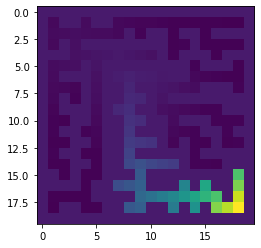

Training time: 32.463346004486084s


In [8]:
# Train the agent 2000 times
episodes = 500
times_visited = np.zeros((qlearning.env * qlearning.env))
start = time.time()
for episode in range(episodes):
    s = maze.reset()
    done = False
    reward = 0
    while not done:
        action = epolicy(s, qlearning.q_values)

        # Get the next state and reward after performing the action
        s_next, r, done = maze.step(action)
        times_visited[s_next] += 1  
        reward += r

        # Update the values of the q table
        qlearning.update_values(s, s_next, action.value.index, r)

        s = s_next
    
    # Update the epsilon policy
    epolicy.update_epsilon()
    
    if episode % 10 == 0:
        print(f"Episode: {episode}, epsilon: {epolicy.epsilon}, reward: {reward}")

end = time.time()

# Get the best actions for each state
best_actions = qlearning.new_values()
plt.imshow(best_actions)
plt.show()
# Print the time spent training the agent
print(f"Training time: {end-start}s")

### Testing and visualising the agent in the MAZE

In [9]:
# Test the agent by visualizing it
state = maze.reset()
timestep, rewards = 0, 0
done = False

while not done:
    selected_action = epolicy(state, qlearning.q_values)
    
    # Perform the selected action
    state, reward, done = maze.step(selected_action)
    rewards += reward
    
    # Display the maze and action information
    clear_output(wait=True)
    maze.display()
    print(f"Time step: {timestep}")
    print(f"State: {state}")
    print(f"Action: {selected_action}")
    print(f"Reward: {reward}")

    timestep += 1

X X X X X X X X X X X X X X X X X X X X 
X . X X . X X . I . . . . . . . . . . X 
X . . . . . . . X . X X . X X . X X X X 
X . X . X X X X X X X X . . X . . . . X 
X X X . . . . . . . . X . X X X . X X X 
X . . . X . X . X X X X X X . X X X . X 
X . X X X . X . . . . . X X . . . . . X 
X . . . X . X X . X X . . . . X X X . X 
X . X . X . X X . . X . X X X X X X X X 
X . X X X . X . . X X . . . . . . X X X 
X . . X X . X X . . X X . X X X . . . X 
X . X X . . X X . X X X . . . X X . X X 
X . . X X . X X . . . X . X . . X . . X 
X . X X . . X X . X X X X X . X X X X X 
X . . X X . X X . . . . . X . . . X X X 
X X . X . . X X X . X X X X X X X X . X 
X X X X . X X . . . X X X . X . X X . X 
X . . . . X X X X . . . . . . . . X . X 
X . X X . . X X . . X X . X . X . . . X 
X X X X X X X X X X X X X X X X X X A X 

Time step: 128
State: 380
Action: Action.DOWN
Reward: 399


### Evaluating the performance of the agent based on our policies 

In [10]:
# Evaluate the performance of the agent after training

total_timesteps, total_penalties = 0, 0
total_rewards = 0
episodes = 500

for _ in range(episodes):
    state = maze.reset()
    timesteps, reward = 0, 0
    done = False
    
    while not done:
        selected_action = epolicy(state, qlearning.q_values)
        
        # Perform selected action and get the next state and current reward
        state, reward, done = maze.step(selected_action)
        
        # Keep track of the total reward
        total_rewards += reward
        
        timesteps += 1

    total_timesteps += timesteps

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_timesteps / episodes}")
print(f"Average rewards per episode: {total_rewards / episodes}")

Results after 500 episodes:
Average timesteps per episode: 138.584
Average rewards per episode: -174.598
